# Support Vector Regression 

### Import all necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

## Loading the dataset

In [2]:
df = pd.read_csv("Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Split the data for train and test

In [3]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

### When using StandardScaler(), fit() method expects a 2D array-like input


In [4]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

#### Model prediction for train dataset

Text(0, 0.5, 'Marks')

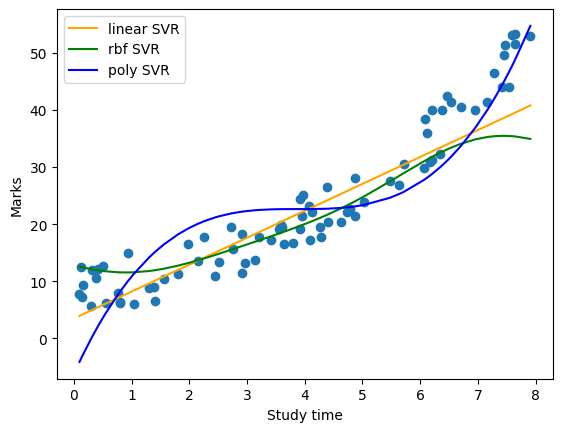

In [ ]:

train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)


#### Visualization

Text(0, 0.5, 'Marks')

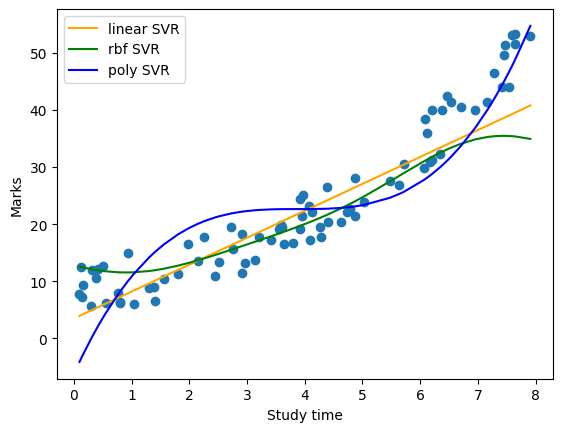

In [ ]:
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

#### Test dataset - metrics

In [9]:
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.83
rmse: 6.7


#### Test dataset - plot

Text(0, 0.5, 'Actual')

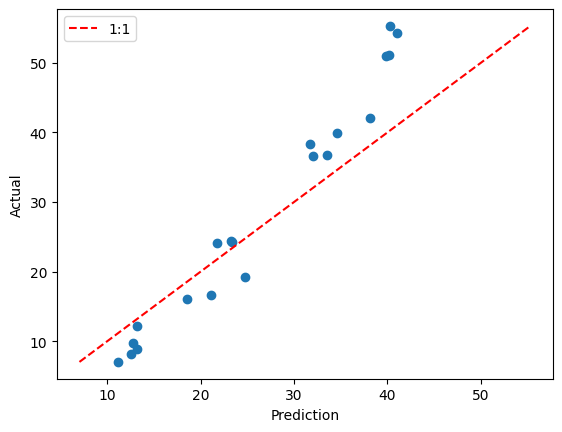

In [10]:
y_test_pred = svr_lin.predict(X_test_scaled)
min_axis = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_axis, max_x], [min_axis, max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

### Conclusion

This analysis demonstrates the use of Support Vector Regression (SVR) with different kernels—linear, radial basis function (RBF), and polynomial—to model the relationship between study time and student marks. The dataset was split into training and testing subsets, and features were scaled to improve model performance.

Among the SVR models tested, the linear kernel provided a competitive balance of simplicity and predictive accuracy, as evidenced by the evaluation metrics on the test data—the R² score and RMSE indicate satisfactory generalization to unseen data. Visualization of predictions versus actual marks further confirms the model’s reasonable fit.

This example highlights the effectiveness of SVR for regression tasks, especially when feature scaling and kernel choice are carefully considered. It also underscores the importance of model evaluation on separate test data to assess predictive performance reliably. Overall, SVR offers a powerful approach to capture relationships in data with potentially nonlinear patterns, supporting robust and interpretable predictions in educational performance modeling and similar domains.